# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from pprint import pprint
from datetime import date
from datetime import datetime
from prettytable import PrettyTable
import seaborn as sns
import warnings
import statsmodels.formula.api as smf

# EDA

In [2]:
warnings.filterwarnings('ignore')

data_temp = pd.read_csv('Assets\Datasets\ddb_modelo_temporal_16-07_testes.csv', delimiter=';')
data = data_temp.copy(deep=True)

# Renaming columns

data['Gender'].replace({'Feminino': 'Female', 'Masculino': 'Male'}, inplace=True)
data['test_result'].replace({'Negativo': 'Negative', 'Positivo': 'Positive', 'Inconclusivo': 'Inconclusive'}, inplace=True)

columns_mapping = {
    'test_result': 'Test_Result',
    'Gender': 'Gender',
    'date_of_birth': 'Date_of_Birth',
    'idade_anos': 'Age_years',
    'priority': 'Priority',
    'CovidConfirmadoCasa': 'Confirmed_COVID_at_Home',
    'ProfissionalSaude': 'Health_Professional',
    'Febre': 'Fever',
    'Tosse': 'Cough',
    'DorGarganta': 'Sore_Throat',
    'Coriza': 'Runny_Nose',
    'Mialgia': 'Myalgia',
    'Enjoo': 'Nausea',
    'Diarreia': 'Diarrhea',
    'PerdaOlfato': 'Loss_of_Smell',
    'FaltaAr': 'Shortness_of_Breath',
    'NA-Sintoma': 'NA_Symptom',
    'Cardiaco': 'Cardiac',
    'ProblemaPulmonar': 'Lung_Problem',
    'Diabetes': 'Diabetes',
    'Obesidade': 'Obesity',
    'Cirrose': 'Cirrhosis',
    'Cancer': 'Cancer',
    'Renal': 'Renal',
    'Transplantado': 'Transplanted',
    'GestacaoRisco': 'High_Risk_Pregnancy',
    'DoenteFigado': 'Liver_Disease',
    'TratamentoImunossupressor': 'Immunosuppressive_Treatment',
    'NA-Risco': 'NA_Risk',
    'Indicado': 'Indicated',
    'DataDosSintomas': 'Symptom_Date',
    'SemanaEpidemiologica': 'Epidemiological_Week',
    'DiasAteDiagnostico': 'Days_to_Diagnosis',
    'Bairro': 'Neighborhood'
}

data.rename(columns=columns_mapping, inplace=True)

data.head()

,Test_Result,Gender,Date_of_Birth,Age_years,Priority,Confirmed_COVID_at_Home,Health_Professional,Fever,Cough,Sore_Throat,...,Transplanted,High_Risk_Pregnancy,Liver_Disease,Immunosuppressive_Treatment,NA_Risk,Indicated,Symptom_Date,Epidemiological_Week,Days_to_Diagnosis,Neighborhood
0,Negative,Male,18/03/1990,30,A,t,f,t,t,t,...,f,f,f,f,f,t,10/06/2020 20:10,7,4,Meier - Rio De Janeiro - RJ
1,Negative,Female,07/06/1996,24,A,f,t,f,t,t,...,f,f,f,f,f,f,10/06/2020 19:35,7,4,Inga - Niteroi - RJ
2,Negative,Male,26/05/1968,52,A,t,f,t,t,f,...,f,f,f,f,t,t,01/06/2020 00:00,6,35,Parque Prazeres - Campos Dos Goytacazes - RJ
3,Negative,Female,10/12/1982,37,A,t,t,f,t,t,...,f,f,f,f,t,t,28/06/2020 00:00,10,8,Centro - Duque De Caxias - RJ
4,Positive,Male,13/04/1954,66,A,t,f,f,t,f,...,f,f,f,f,t,t,10/06/2020 19:41,7,4,Barra Da Tijuca - Rio De Janeiro - RJ


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64174 entries, 0 to 64173
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Test_Result                  64174 non-null  object
 1   Gender                       64174 non-null  object
 2   Date_of_Birth                64174 non-null  object
 3   Age_years                    64174 non-null  int64 
 4   Priority                     64174 non-null  object
 5   Confirmed_COVID_at_Home      64174 non-null  object
 6   Health_Professional          64174 non-null  object
 7   Fever                        64174 non-null  object
 8   Cough                        64174 non-null  object
 9   Sore_Throat                  64174 non-null  object
 10  Runny_Nose                   64174 non-null  object
 11  Myalgia                      64174 non-null  object
 12  Nausea                       64174 non-null  object
 13  Diarrhea                     64

In [4]:
# We have outliers in the numerical columns that should be removed: 
data.describe()

,Age_years,Epidemiological_Week,Days_to_Diagnosis
count,64174.000000,64174.000000,64174.000000
mean,42.921105,-1.230966,64.328825
std,27.375194,653.349055,4573.580356
min,0.000000,-94963.000000,-20.000000
25%,32.000000,3.000000,4.000000
50%,41.000000,6.000000,11.000000
75%,52.000000,8.000000,20.000000
max,1825.000000,13.000000,664810.000000


In [5]:
print('infinity values : ', data.isin([np.inf, -np.inf]).sum().sum())
print('Duplicated rows: ', data.duplicated().sum().sum())
print('Formatting errors in the column Date of Birth : ' , pd.to_datetime(data['Date_of_Birth'],errors = 'coerce',dayfirst=True).isna().sum())
print('Formatting errors in the column Symptom Date : ' , pd.to_datetime(data['Symptom_Date'],errors = 'coerce',dayfirst=True).isna().sum())
print(f"The number of rows with 'Epidemiological_Week' less than zero is: {(data['Epidemiological_Week'] < 0).sum()}")
print(f"The number of rows with 'Days_to_Diagnosis' less than zero is: {(data['Days_to_Diagnosis'] < 0).sum()}")
print(f"The number of rows with 'Days_to_Diagnosis' more than one year is: {(data['Days_to_Diagnosis'] > 365).sum()}")
print(f"The number of rows with 'Age_years' more than 120 is: {(data['Age_years'] > 120).sum()}")

infinity values :  0
Duplicated rows:  93
Formatting errors in the column Date of Birth :  37
Formatting errors in the column Symptom Date :  3
The number of rows with 'Epidemiological_Week' less than zero is: 2938
The number of rows with 'Days_to_Diagnosis' less than zero is: 1
The number of rows with 'Days_to_Diagnosis' more than one year is: 107
The number of rows with 'Age_years' more than 120 is: 72


### Diseases

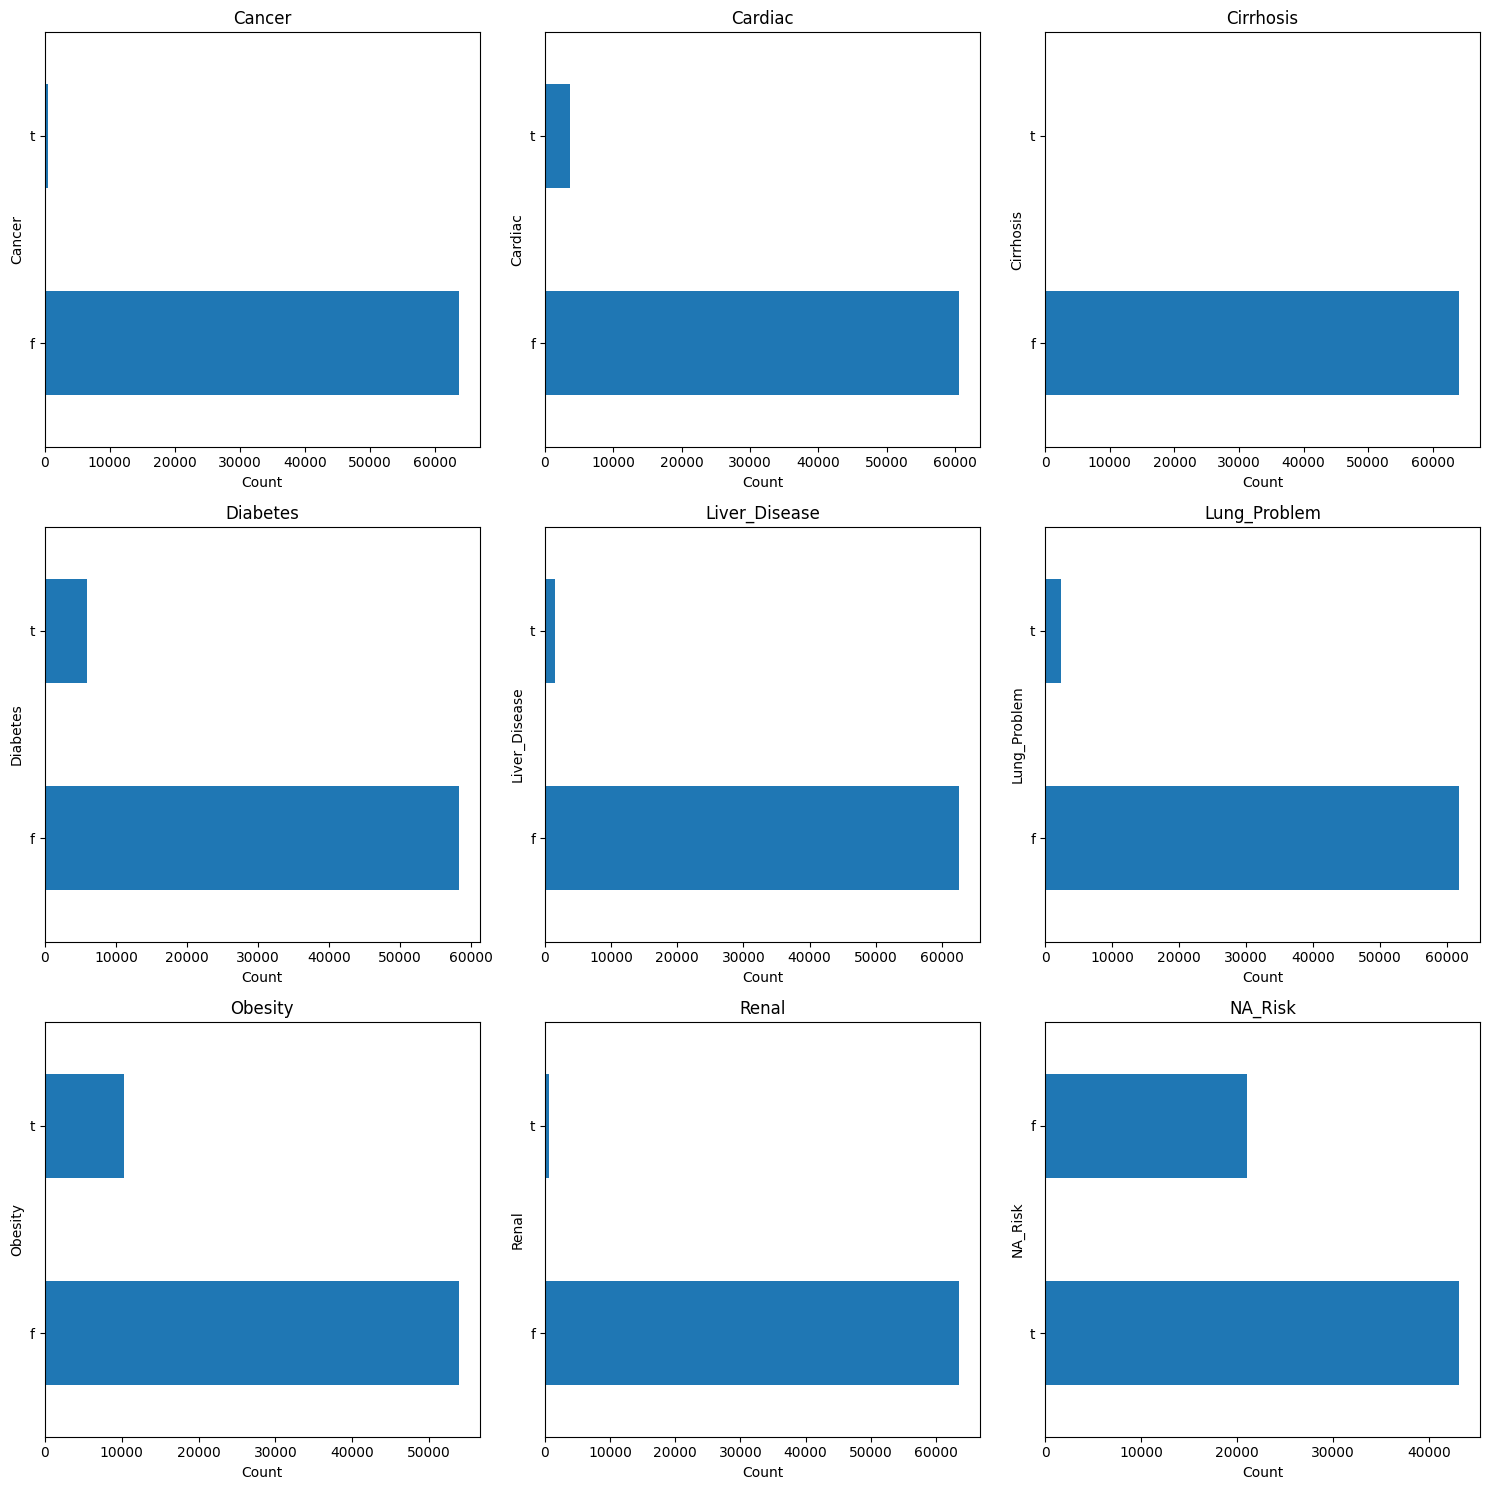

In [6]:
risk_columns = ['Cancer', 'Cardiac', 'Cirrhosis', 'Diabetes', 'Liver_Disease', 'Lung_Problem', 'Obesity', 'Renal', 'NA_Risk']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(risk_columns):
    row = i // 3
    col = i % 3  
    data[col_name].value_counts().plot(kind='barh', ax=axes[row, col], title=col_name)
    axes[row, col].set_xlabel('Count')

plt.tight_layout()
plt.show()

### Symptoms

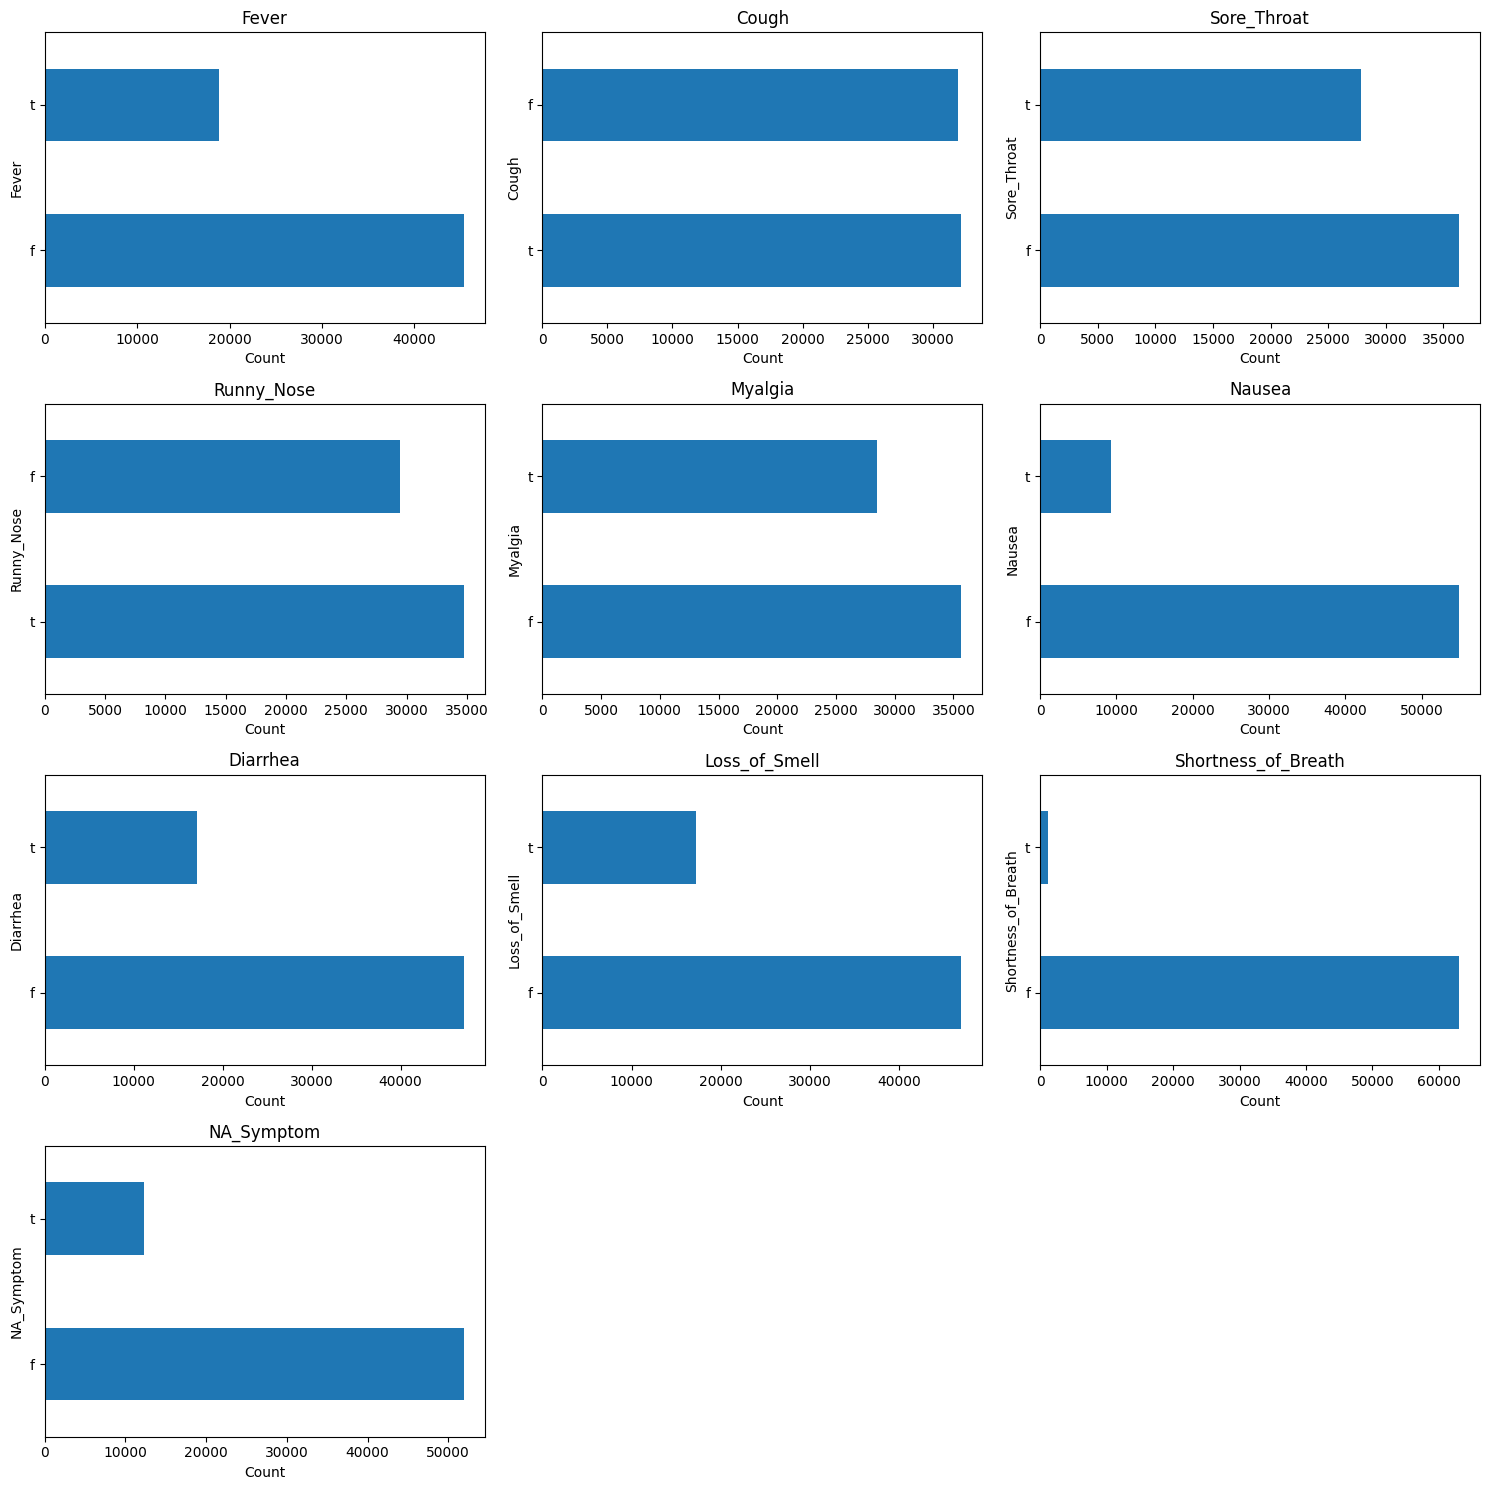

In [7]:
symptom_columns = data.iloc[:,7:17].columns.tolist()
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(symptom_columns):
    row = i // 3
    col = i % 3
    data[col_name].value_counts().plot(kind='barh', ax=axes[row, col], title=col_name)
    axes[row, col].set_xlabel('Count')

for ax in axes[-1, 1:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

### Remaining columns

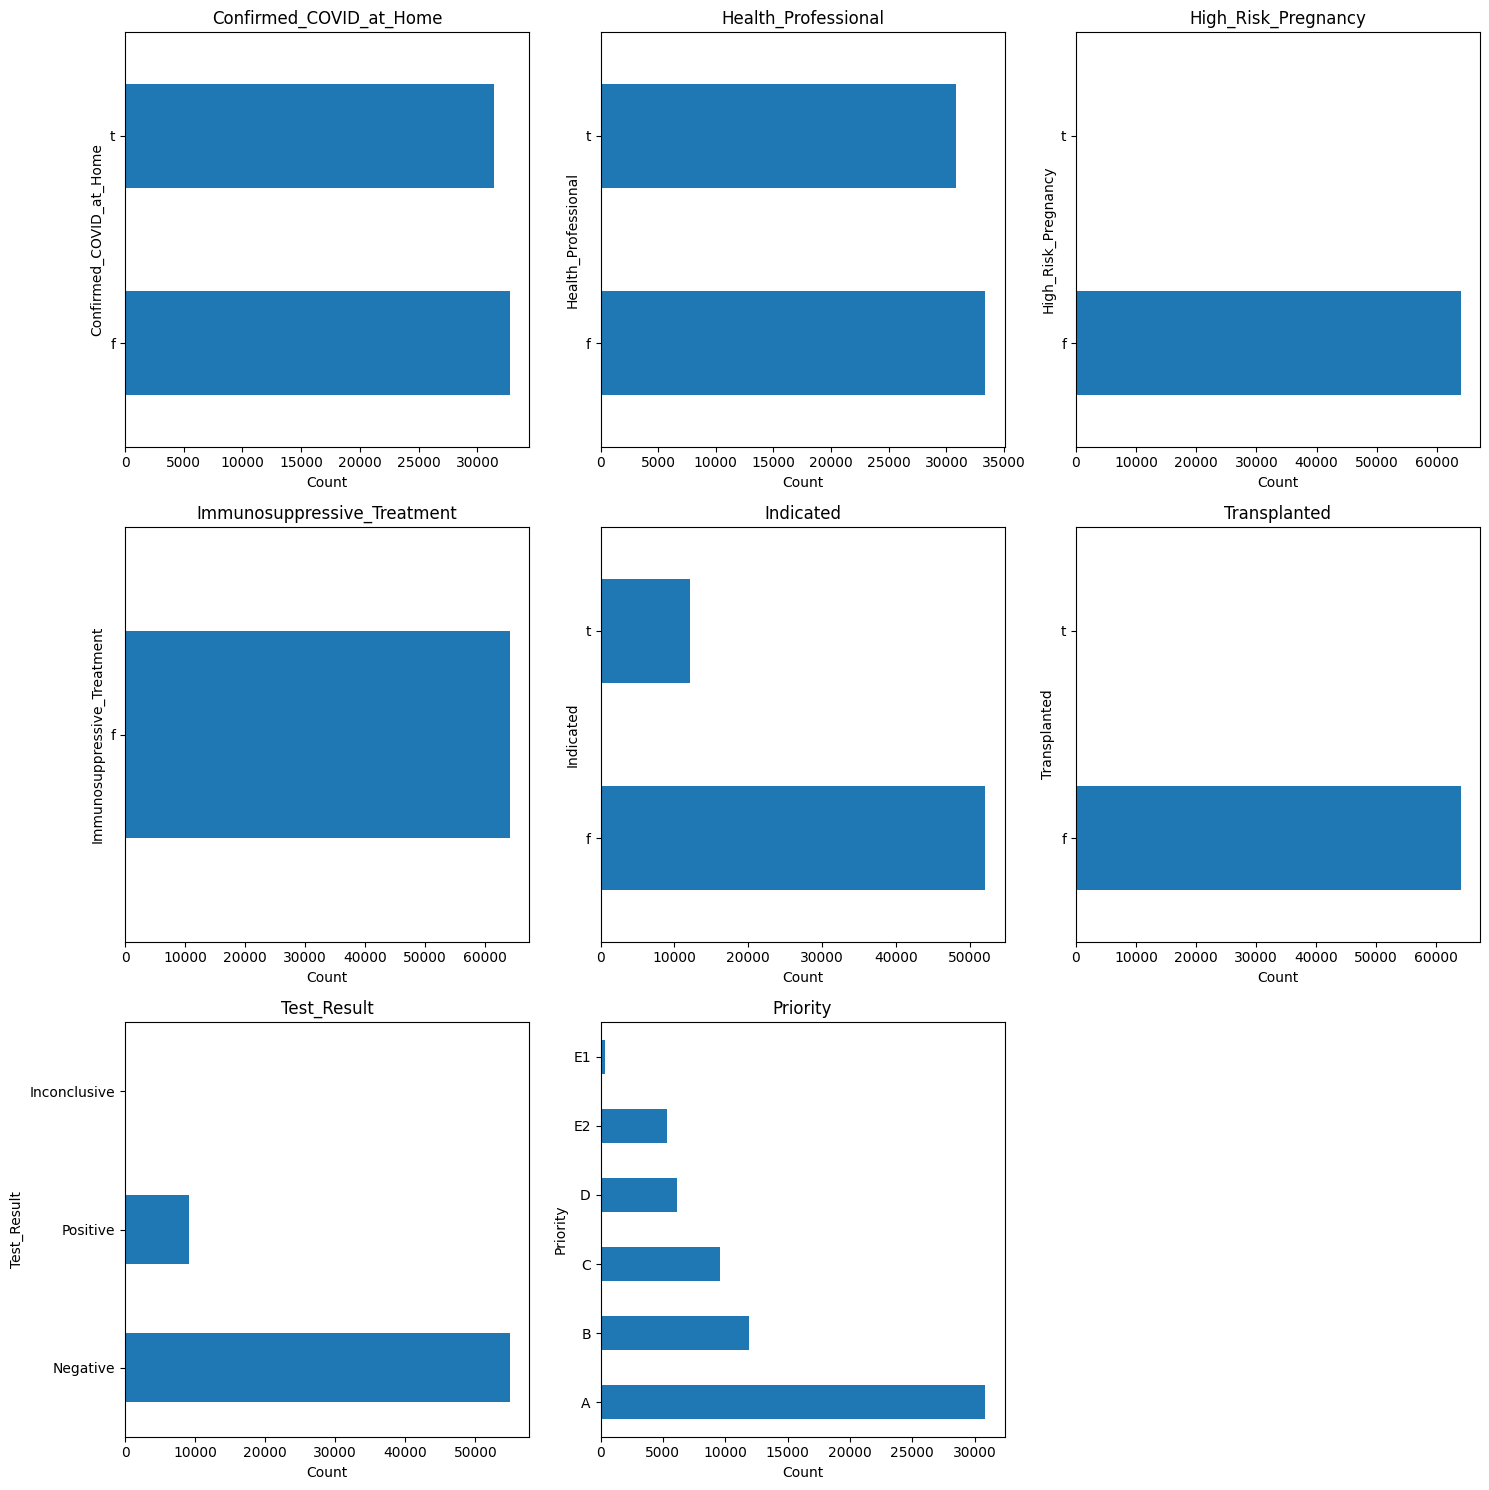

In [8]:
remaining_columns = ['Confirmed_COVID_at_Home','Health_Professional','High_Risk_Pregnancy','Immunosuppressive_Treatment','Indicated', 'Transplanted','Test_Result','Priority']
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

for i, col_name in enumerate(remaining_columns):
    row = i // 3
    col = i % 3
    data[col_name].value_counts().plot(kind='barh', ax=axes[row, col], title=col_name)
    axes[row, col].set_xlabel('Count')

for ax in axes[-1, 2:]:
    ax.axis('off')

plt.tight_layout()
plt.show()

# Pre-processing

In [9]:
# removing lines where the test was inconclusive
data = data.loc[(data['Test_Result'] != 'Inconclusive')]

# removing duplicate rows
data.drop_duplicates(keep = 'first' ,inplace = True) 

# Map test results to binary values and replace 't'/'f' with 1/0 in the DataFrame
dic = {'Negative':0,'Positive':1}
data['Test_Result']=data['Test_Result'].map(dic)
data.replace({'t' : 1, 'f' : 0}, inplace = True)

# Removing date formatting errors
data['Date_of_Birth'] = pd.to_datetime(data['Date_of_Birth'],errors = 'coerce',dayfirst=True)
data['Symptom_Date'] = pd.to_datetime(data['Symptom_Date'],errors = 'coerce',dayfirst=True)
data.dropna(inplace = True)

# Ensuring that the age has been calculated correctly
#today = date.today()
reference_date = datetime(2020, 12, 31) # The dataset is from 2020
data['Age_years'] = data['Date_of_Birth'].apply(lambda x: reference_date.year - x.year - ((reference_date.month, reference_date.day) < (x.month, x.day)))
data = data.loc[(data['Age_years'] <= 120)] # dataset contains birth dates from the 17th century

#data = data.loc[(data['Epidemiological Week'] > 0)] 
#data = data.loc[(data['Days to Diagnosis'] > 0)] 
#data.loc[data['Days to Diagnosis'] < 365, 'Days to Diagnosis'] = -1 #Here, -1 indicates that the diagnosis was not made

data.reset_index(inplace=True, drop = True)

data_symptoms = data.iloc[:,7:17]
data_symptoms['Test_Result'] = data['Test_Result']
data_symptoms.to_csv('Assets/Datasets/df_preprocessed.csv', index=False)

data

,Test_Result,Gender,Date_of_Birth,Age_years,Priority,Confirmed_COVID_at_Home,Health_Professional,Fever,Cough,Sore_Throat,...,Transplanted,High_Risk_Pregnancy,Liver_Disease,Immunosuppressive_Treatment,NA_Risk,Indicated,Symptom_Date,Epidemiological_Week,Days_to_Diagnosis,Neighborhood
0,0,Male,1990-03-18,30,A,1,0,1,1,1,...,0,0,0,0,0,1,2020-06-10 20:10:00,7,4,Meier - Rio De Janeiro - RJ
1,0,Female,1996-06-07,24,A,0,1,0,1,1,...,0,0,0,0,0,0,2020-06-10 19:35:00,7,4,Inga - Niteroi - RJ
2,0,Male,1968-05-26,52,A,1,0,1,1,0,...,0,0,0,0,1,1,2020-06-01 00:00:00,6,35,Parque Prazeres - Campos Dos Goytacazes - RJ
3,0,Female,1982-12-10,38,A,1,1,0,1,1,...,0,0,0,0,1,1,2020-06-28 00:00:00,10,8,Centro - Duque De Caxias - RJ
4,1,Male,1954-04-13,66,A,1,0,0,1,0,...,0,0,0,0,1,1,2020-06-10 19:41:00,7,4,Barra Da Tijuca - Rio De Janeiro - RJ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63867,0,Female,1942-11-03,78,A,1,0,0,1,1,...,0,0,0,0,0,1,2020-06-04 10:01:00,7,19,Maracana - Rio De Janeiro - RJ
63868,0,Male,1968-04-27,52,C,0,0,0,0,0,...,0,0,0,0,0,0,2020-06-04 10:12:00,7,14,Boa Viagem - Niteroi - RJ
63869,1,Female,1965-06-22,55,D,0,0,1,0,0,...,0,0,0,0,0,0,2020-04-10 00:00:00,-1,91,Bento Ribeiro - Rio De Janeiro - RJ
63870,0,Male,1954-06-29,66,B,1,1,1,1,1,...,0,0,0,0,0,0,2020-06-25 00:00:00,9,11,Icarai - Niteroi - RJ


## Correlation between symptoms

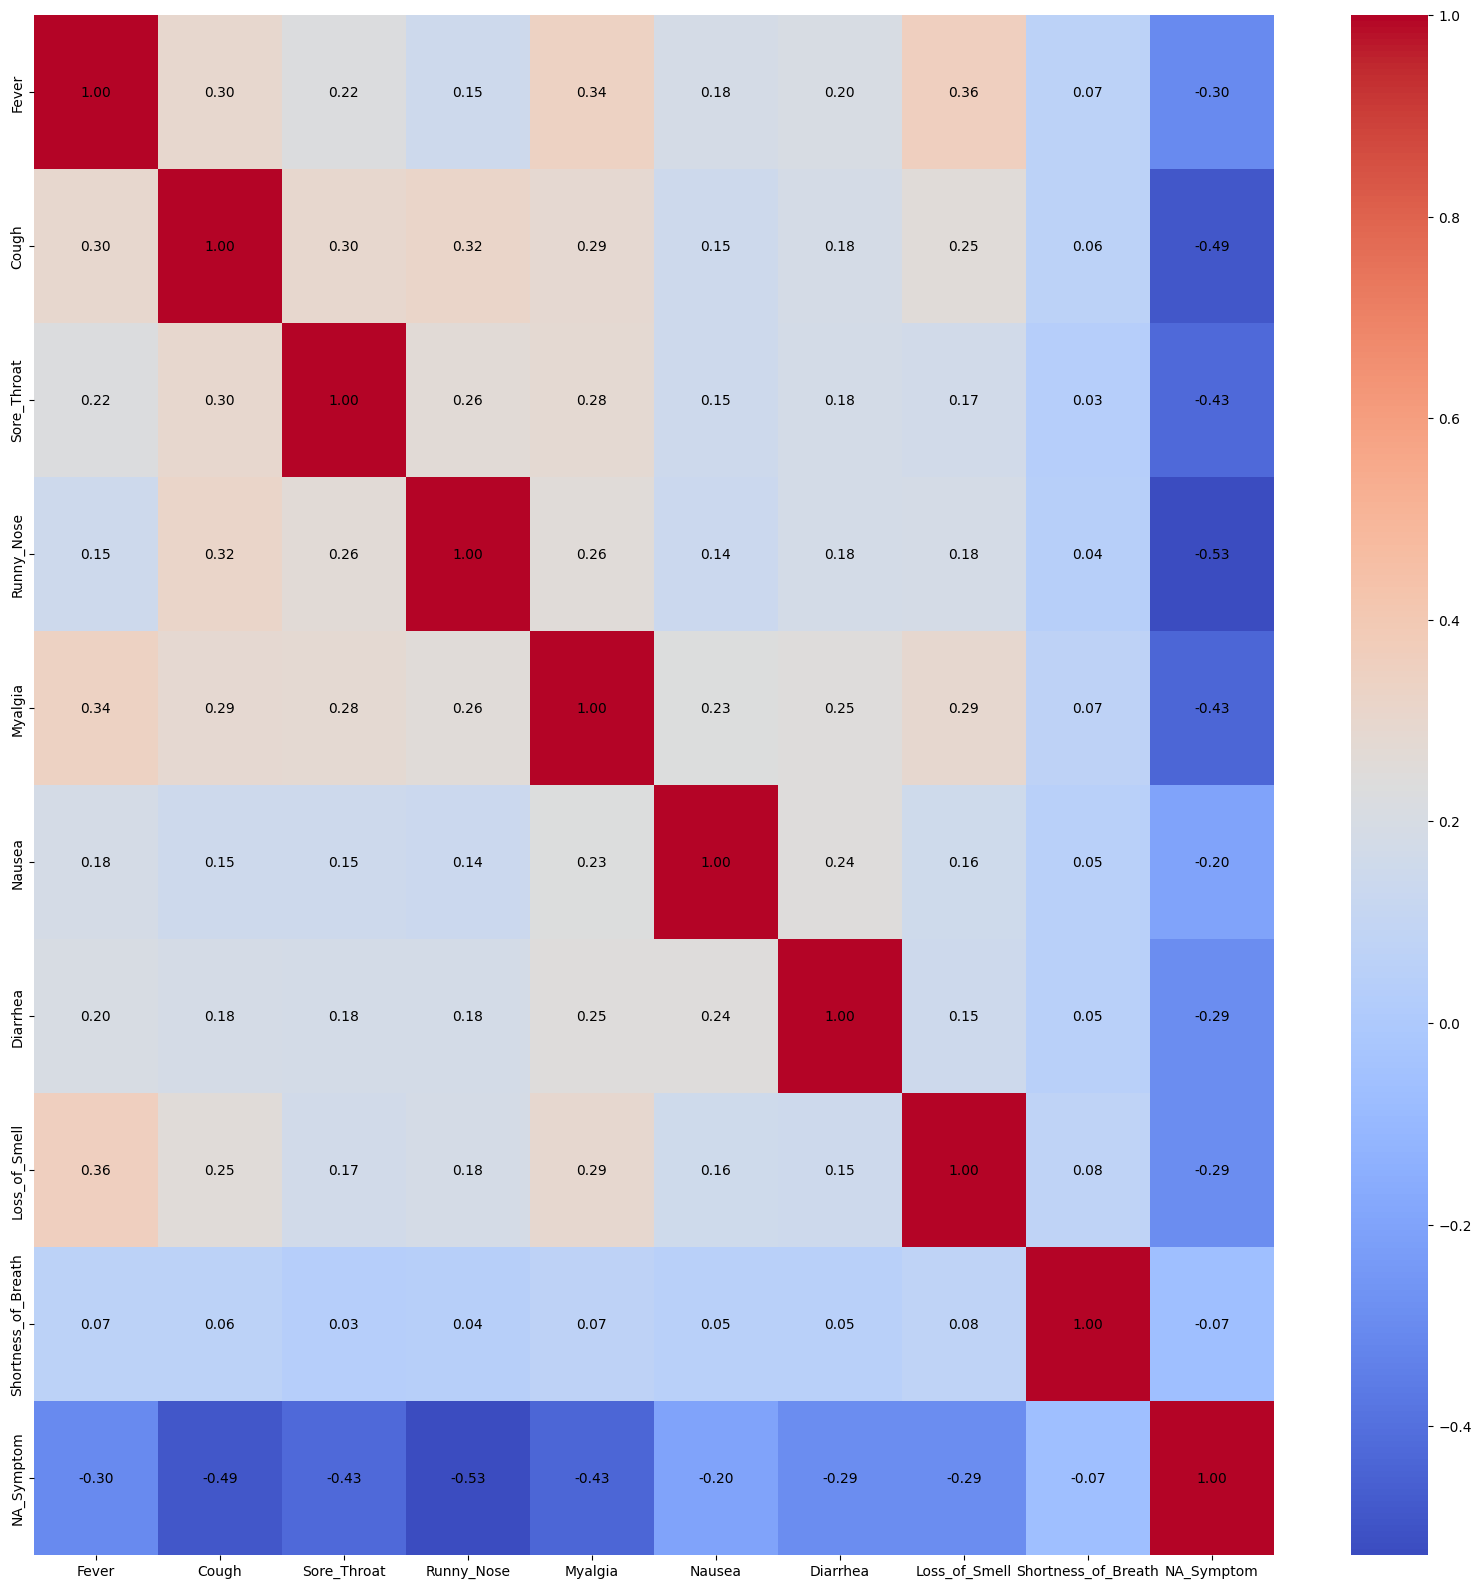

In [10]:
correlation_matrix = data.iloc[:,7:17].corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(20, 20))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')

## Correlation between diseases

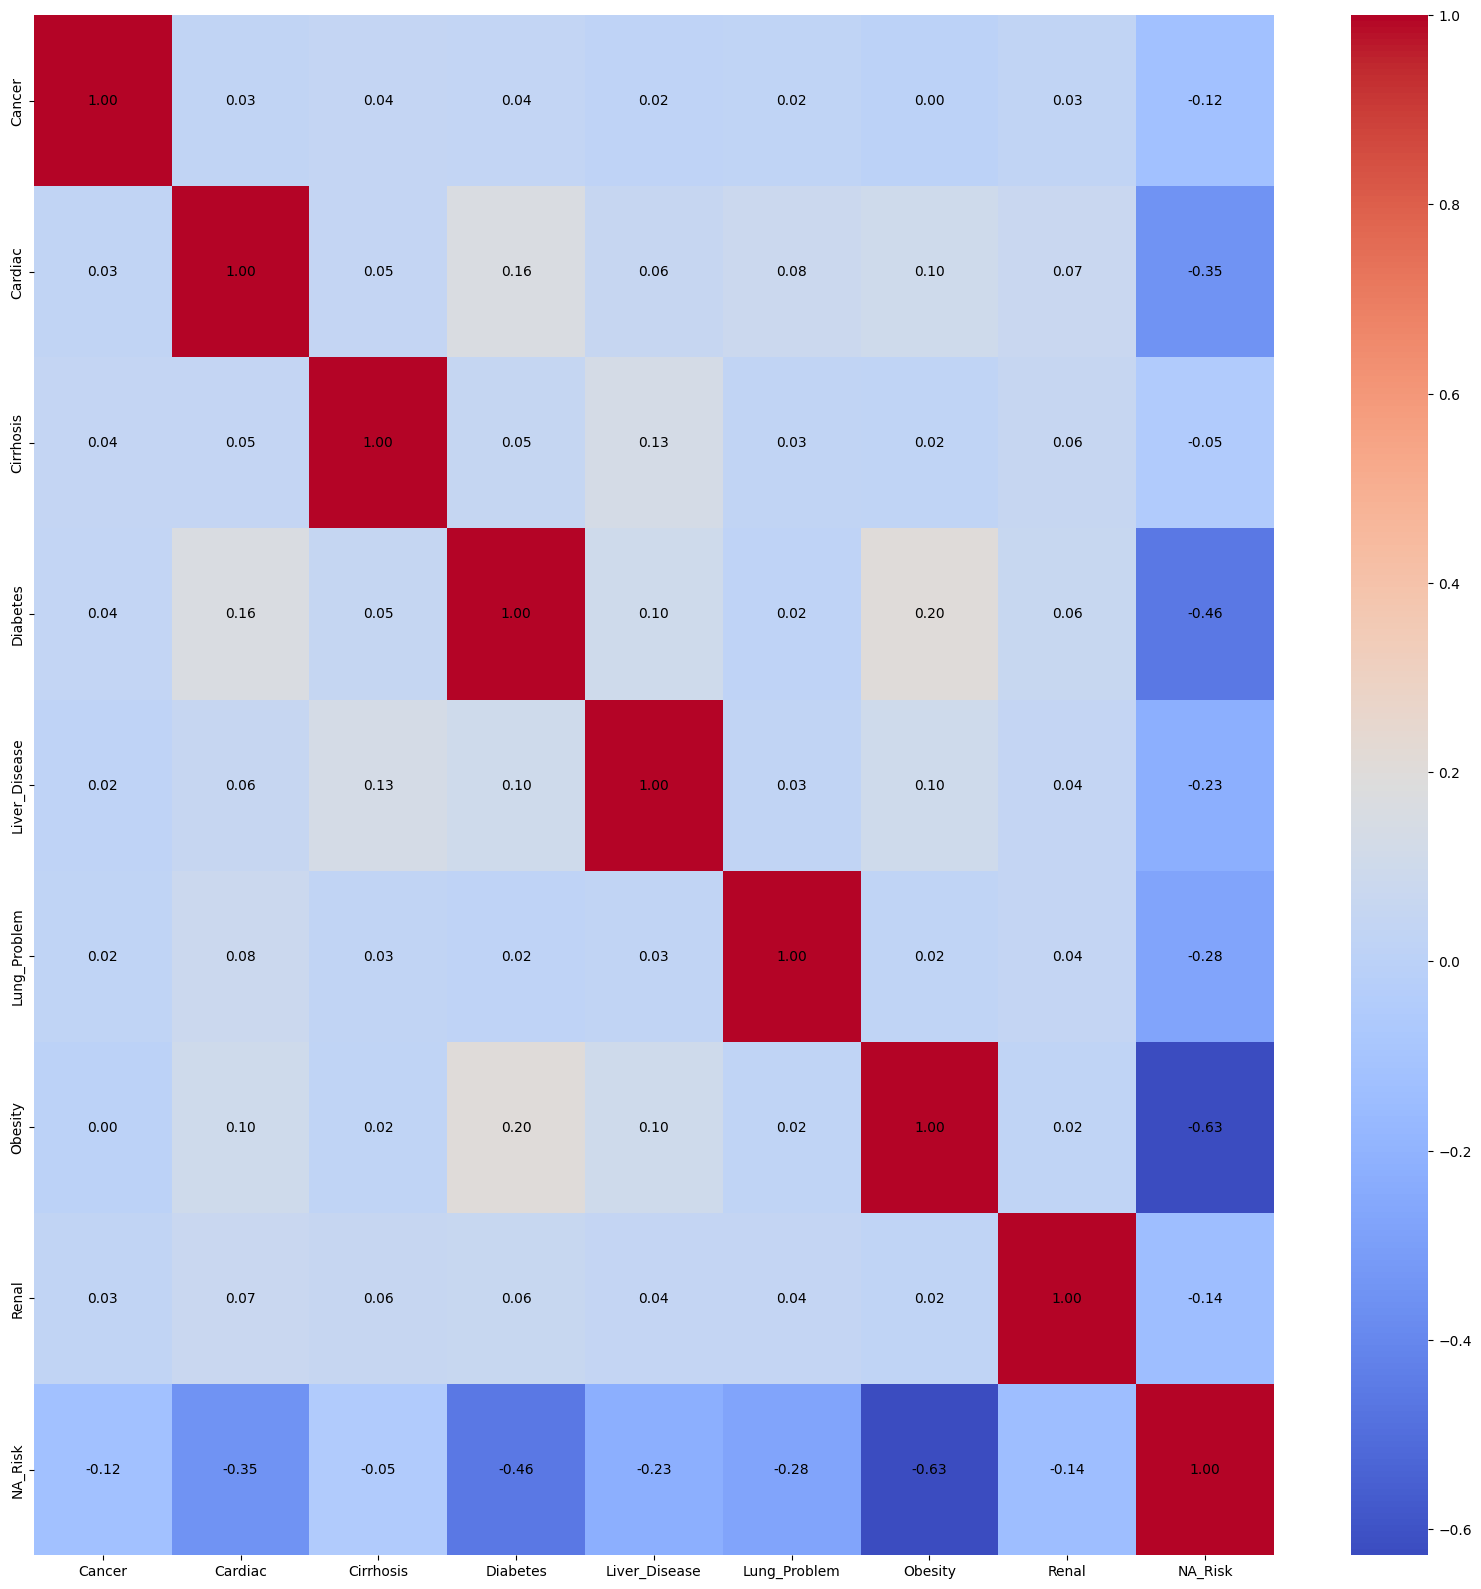

In [11]:
correlation_matrix = data[risk_columns].corr()

# Plot correlation matrix using seaborn
plt.figure(figsize=(20, 20))  # Adjust width and height as needed
sns.heatmap(correlation_matrix, cmap='coolwarm', fmt=".2f")

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        plt.text(j + 0.5, i + 0.5, '{:.2f}'.format(correlation_matrix.iloc[i, j]), ha='center', va='center', color='black')

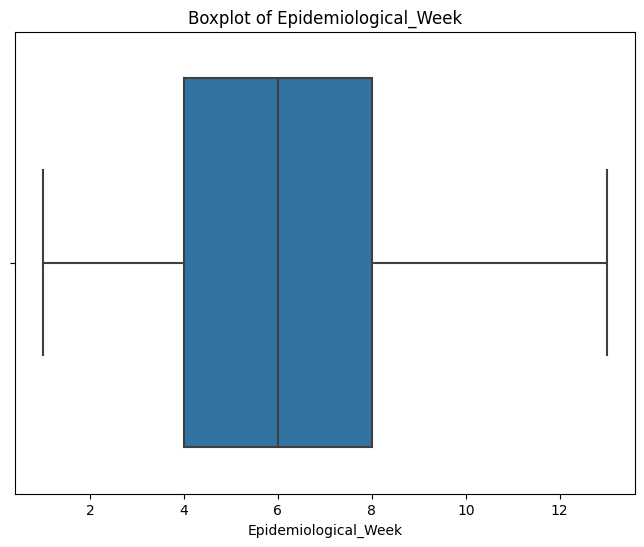

In [12]:
filtered_data = data[data['Epidemiological_Week'] > 0]

# Create the boxplot with seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_data['Epidemiological_Week'])
plt.title('Boxplot of Epidemiological_Week')
plt.xlabel('Epidemiological_Week')
plt.show()

In [13]:
data['Age_years'].describe()

count    63872.000000
mean        42.778635
std         13.993275
min          0.000000
25%         33.000000
50%         41.000000
75%         52.000000
max        120.000000
Name: Age_years, dtype: float64

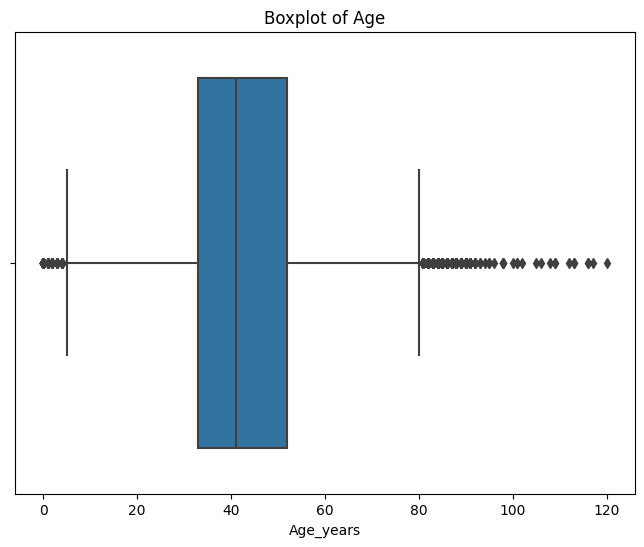

In [14]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Age_years'])
plt.title('Boxplot of Age')
plt.xlabel('Age_years')
plt.show()

## Summary

In [15]:
def calculate_iqr(data, column_name, filter_column=None, filter_value=None):
    if filter_column and filter_value is not None:
        filtered_data = data[data[filter_column] == filter_value][column_name]
    else:
        filtered_data = data[column_name]
    
    q3, q1 = np.percentile(filtered_data, [75, 25])
    median_value = np.percentile(filtered_data, 50)
    iqr = q3 - q1
    lower_fence = q1 - (1.5 * iqr)
    higher_fence = q3 + (1.5 * iqr)
    
    return median_value, q1, q3, iqr, lower_fence, higher_fence

def format_counts_percent(count, total):
    percent = np.round(count / total * 100, 2)
    return f"{count} ({percent})"

def create_summary_table(data):
    total_count = len(data)
    positive_count = data['Test_Result'].value_counts()[1]
    negative_count = data['Test_Result'].value_counts()[0]
    
    summary = pd.DataFrame(index=["Participants, n (%)", "Female, n (%)", "Age_years, median [IQR]", "Health_Professional, n(%)"],
                           columns=["Total", "Positive Test", "Negative test"])
    
    summary.loc["Participants, n (%)"] = [
        format_counts_percent(total_count, total_count),
        format_counts_percent(positive_count, total_count),
        format_counts_percent(negative_count, total_count)
    ]
    
    female_count = data['Gender'].value_counts()[0]
    female_positive = data.groupby(['Gender', 'Test_Result']).size().unstack(1)[1][0]
    female_negative = data.groupby(['Gender', 'Test_Result']).size().unstack(1)[0][0]
    
    summary.loc["Female, n (%)"] = [
        format_counts_percent(female_count, total_count),
        format_counts_percent(female_positive, positive_count),
        format_counts_percent(female_negative, negative_count)
    ]
    
    median_total, q1_total, q3_total, iqr_total, _, _ = calculate_iqr(data, 'Age_years')
    median_positive, q1_positive, q3_positive, iqr_positive, _, _ = calculate_iqr(data, 'Age_years', 'Test_Result', 1)
    median_negative, q1_negative, q3_negative, iqr_negative, _, _ = calculate_iqr(data, 'Age_years', 'Test_Result', 0)
    
    summary.loc["Age_years, median [IQR]"] = [
        f"{median_total} ({q1_total} - {q3_total})",
        f"{median_positive} ({q1_positive} - {q3_positive})",
        f"{median_negative} ({q1_negative} - {q3_negative})"
    ]
    
    health_professional_count = data['Health_Professional'].value_counts()[1]
    health_professional_positive = data.groupby(["Health_Professional", 'Test_Result']).size().unstack(1)[1][1]
    health_professional_negative = data.groupby(["Health_Professional", 'Test_Result']).size().unstack(1)[0][1]
    
    summary.loc["Health_Professional, n(%)"] = [
        format_counts_percent(health_professional_count, total_count),
        format_counts_percent(health_professional_positive, positive_count),
        format_counts_percent(health_professional_negative, negative_count)
    ]
    
    return summary

def create_symptom_table(data):
    symptoms = data.columns[7:17]
    total_count = len(data)
    positive_count = data['Test_Result'].value_counts()[1]
    negative_count = data['Test_Result'].value_counts()[0]
    
    symptom_summary = pd.DataFrame(index=symptoms, columns=["Total", "Positive Test", "Negative test"])
    
    for symptom in symptoms:
        total_symptom = data[symptom].value_counts()[1]
        positive_symptom = data.groupby([symptom, 'Test_Result']).size().unstack(1)[1][1]
        negative_symptom = data.groupby([symptom, 'Test_Result']).size().unstack(1)[0][1]
        
        symptom_summary.loc[symptom] = [
            format_counts_percent(total_symptom, total_count),
            format_counts_percent(positive_symptom, positive_count),
            format_counts_percent(negative_symptom, negative_count)
        ]
    
    return symptom_summary

def main(data):
    summary_table = create_summary_table(data)
    symptom_table = create_symptom_table(data)
    final_table = pd.concat([summary_table, symptom_table])
    return final_table

In [16]:
result_table = main(data)
result_table

,Total,Positive Test,Negative test
"Participants, n (%)",63872 (100.0),9105 (14.26),54767 (85.74)
"Female, n (%)",38970 (61.01),5437 (59.71),33533 (61.23)
"Age_years, median [IQR]",41.0 (33.0 - 52.0),43.0 (34.0 - 54.0),41.0 (33.0 - 52.0)
"Health_Professional, n(%)",30653 (47.99),3686 (40.48),26967 (49.24)
Fever,18747 (29.35),4423 (48.58),14324 (26.15)
Cough,32056 (50.19),5734 (62.98),26322 (48.06)
Sore_Throat,27671 (43.32),4037 (44.34),23634 (43.15)
Runny_Nose,34558 (54.11),5287 (58.07),29271 (53.45)
Myalgia,28335 (44.36),5459 (59.96),22876 (41.77)
Nausea,9261 (14.5),1865 (20.48),7396 (13.5)


# Logistic regression adjusted for age and gender, for each symptom

In [17]:
odds_ratios = []
lowerCI= []
upperCI = []


for i, var in enumerate(symptom_columns):
    formula = f"Test_Result ~ {var} + Gender + Age_years" # remove the confounding effects of age and gender
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")
        model = smf.logit(formula, data = data).fit(disp=0)

    odds_ratios.append(np.exp(model.params[1]))
    lowerCI.append(np.exp(model.conf_int()[0][1]))
    upperCI.append(np.exp(model.conf_int()[1][1]))

or_ = pd.DataFrame({"OR": odds_ratios,"Lower CI": lowerCI,"Upper CI": upperCI})
or_.index = symptom_columns
or_ = np.round(or_,2)
or_ = or_.astype(str)
or_['OR (95% CI)'] = or_.apply(lambda x: x['OR'] + ' (' + x['Lower CI'] + ' ' + '-' + ' ' + x['Upper CI'] + ')', axis=1)
or_.drop(columns = ['OR','Lower CI','Upper CI'], inplace = True)
or_

,OR (95% CI)
Fever,1.03 (0.98 - 1.07)
Cough,1.07 (1.02 - 1.12)
Sore_Throat,1.07 (1.02 - 1.12)
Runny_Nose,1.07 (1.03 - 1.12)
Myalgia,1.13 (1.08 - 1.18)
Nausea,1.11 (1.06 - 1.16)
Diarrhea,1.07 (1.02 - 1.12)
Loss_of_Smell,1.11 (1.06 - 1.17)
Shortness_of_Breath,1.06 (1.01 - 1.11)
NA_Symptom,1.11 (1.06 - 1.16)


In [18]:
def plot_odds_ratios(odds_ratios, symptom_columns, lowerCI, upperCI):
    # Create tuples and sort
    tuple_od = sorted(zip(odds_ratios, symptom_columns))

    y_ordered = [item[1] for item in tuple_od]
    x_ordered = [item[0] for item in tuple_od]

    # Create tuples with confidence intervals and sort
    tuple_conf = sorted(zip(odds_ratios, lowerCI, upperCI, symptom_columns))

    x_errormin = [item[1] for item in tuple_conf]
    x_errormax = [item[2] for item in tuple_conf]

    # Calculate the error
    x_errormin = [x - y for x, y in zip(x_ordered, x_errormin)]
    x_errormax = [x - y for x, y in zip(x_errormax, x_ordered)]
    x_error = [x_errormin, x_errormax]

    # Plot
    plt.figure(figsize=(10, 6))
    plt.errorbar(x_ordered, y_ordered, xerr=x_error, fmt='o', ecolor='red', capsize=5, capthick=2, elinewidth=1, markersize=5, markerfacecolor='blue')
    plt.xlabel("Odds ratio", fontsize=14)
    plt.ylabel("Symptoms", fontsize=14)
    plt.title('Association between symptoms and SARS-CoV-2 infection', fontsize=16)
    plt.xlim(0.95, 1.2)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

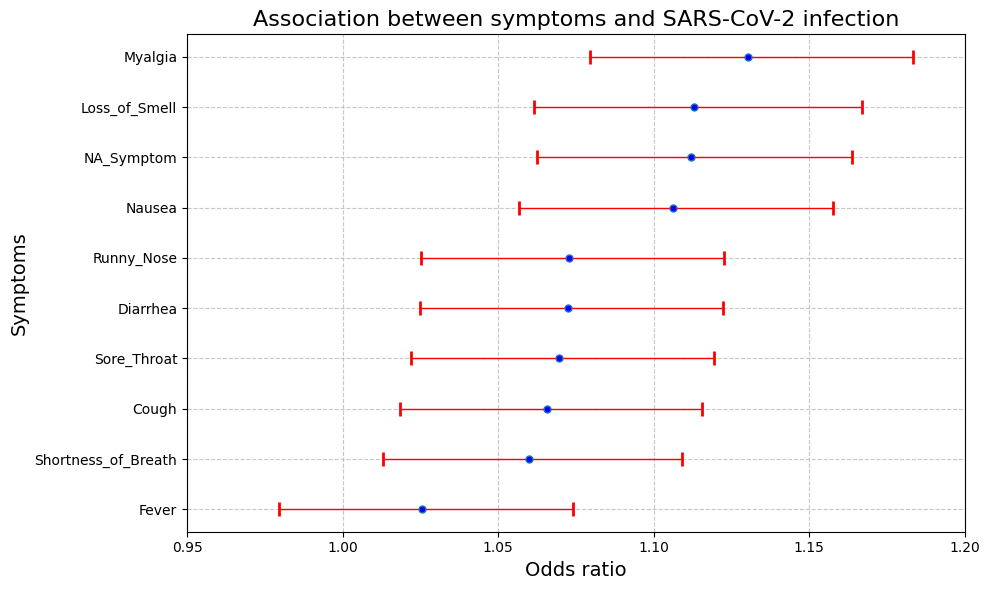

In [19]:
plot_odds_ratios(odds_ratios, symptom_columns, lowerCI, upperCI)